<a href="https://colab.research.google.com/github/jrbdbe26/Graph/blob/main/Practicheskaya_1/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ⚡ НАСТРОЙКА И ИМПОРТ БИБЛИОТЕК
print("=== ЗАПУСК ПРАКТИЧЕСКОЙ РАБОТЫ ===")
print("ШАГ 1: Устанавливаем и импортируем библиотеки...")

# Устанавливаем необходимые библиотеки
!pip install seaborn plotly -q

# Импортируем все нужные модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import io
import requests
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Настраиваем отображение графиков
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
%matplotlib inline

print("✅ Библиотеки успешно загружены!")
print("📊 Готовы к анализу данных...")

=== ЗАПУСК ПРАКТИЧЕСКОЙ РАБОТЫ ===
ШАГ 1: Устанавливаем и импортируем библиотеки...
✅ Библиотеки успешно загружены!
📊 Готовы к анализу данных...


In [4]:
# 📥 ЗАГРУЗКА ДАННЫХ
print("ШАГ 2: Загружаем данные кибератак...")

# Пробуем скачать данные автоматически
try:
    print("🔄 Пытаемся скачать данные из интернета...")
    url = "https://raw.githubusercontent.com/tnmyk/UNSW-NB15/master/UNSW_NB15_training-set.csv"
    df = pd.read_csv(url)
    print(f"✅ Данные успешно загружены из интернета!")
    print(f"📏 Размер данных: {df.shape}")
    print(f"📋 Столбцы: {list(df.columns)}")

except Exception as e:
    print("❌ Не удалось загрузить автоматически")
    print("📤 Пожалуйста, загрузите файл вручную...")

    # Загрузка файла с компьютера
    uploaded = files.upload()

    # Получаем имя загруженного файла
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"✅ Файл '{filename}' успешно загружен!")
    print(f"📏 Размер данных: {df.shape}")

# Показываем первые строки данных
print("\n🔍 Первые 5 строк данных:")
display(df.head())

ШАГ 2: Загружаем данные кибератак...
🔄 Пытаемся скачать данные из интернета...
❌ Не удалось загрузить автоматически
📤 Пожалуйста, загрузите файл вручную...


Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv
Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set.csv
Saving UNSW-NB15_LIST_EVENTS.csv to UNSW-NB15_LIST_EVENTS.csv
Saving UNSW-NB15_4.csv to UNSW-NB15_4.csv
Saving UNSW-NB15_3.csv to UNSW-NB15_3.csv
Saving UNSW-NB15_2.csv to UNSW-NB15_2.csv
Saving UNSW-NB15_1.csv to UNSW-NB15_1.csv
Saving NUSW-NB15_features.csv to NUSW-NB15_features.csv
✅ Файл 'UNSW_NB15_training-set.csv' успешно загружен!
📏 Размер данных: (82332, 45)

🔍 Первые 5 строк данных:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ШАГ 3: Проводим разведочный анализ данных...
📊 Основная информация о данных:
• Размер данных: (82332, 45)
• Количество строк: 82332
• Количество столбцов: 45
• Пропущенные значения: 0

🎯 Распределение целевой переменной (атаки vs нормальный трафик):
• Нормальный трафик (0): 37000 записей
• Атаки (1): 45332 записей
• Соотношение: label
1    0.5506
0    0.4494
Name: proportion, dtype: float64

📈 Создаем графики...


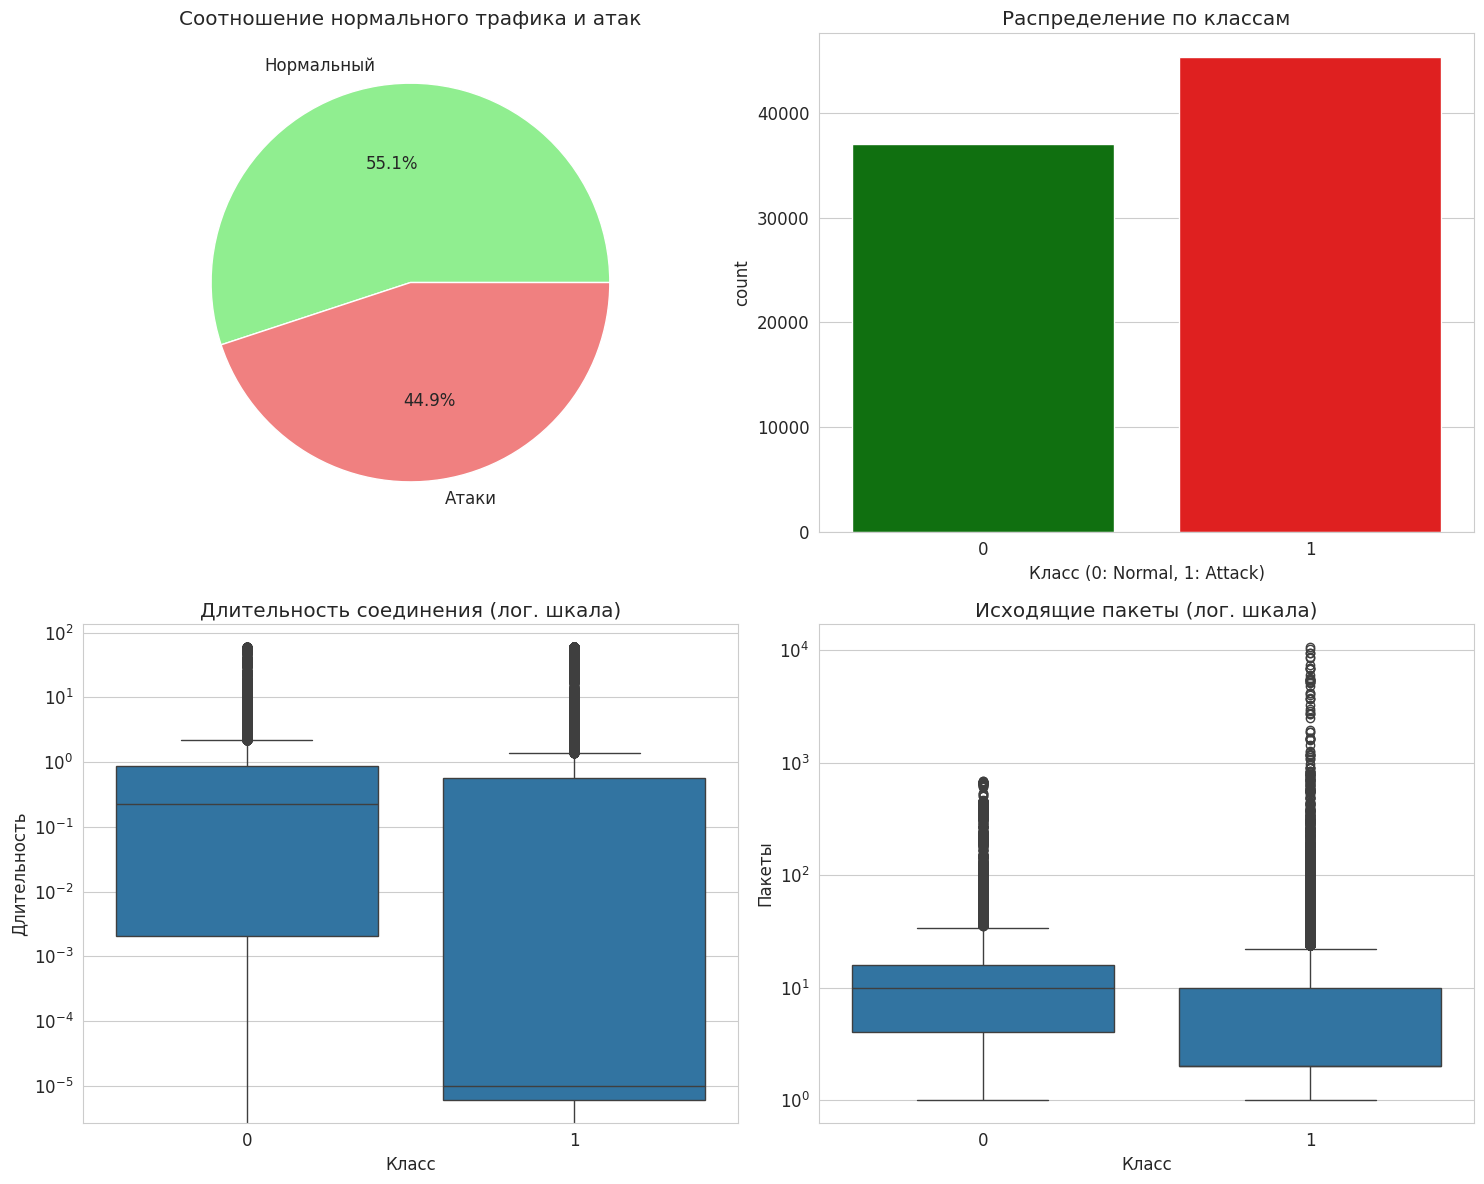

✅ Визуализация создана!


In [5]:
# 🔍 РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)
print("ШАГ 3: Проводим разведочный анализ данных...")

print("📊 Основная информация о данных:")
print(f"• Размер данных: {df.shape}")
print(f"• Количество строк: {df.shape[0]}")
print(f"• Количество столбцов: {df.shape[1]}")
print(f"• Пропущенные значения: {df.isnull().sum().sum()}")

print("\n🎯 Распределение целевой переменной (атаки vs нормальный трафик):")
attack_counts = df['label'].value_counts()
print(f"• Нормальный трафик (0): {attack_counts[0]} записей")
print(f"• Атаки (1): {attack_counts[1]} записей")
print(f"• Соотношение: {df['label'].value_counts(normalize=True)}")

# Создаем визуализации
print("\n📈 Создаем графики...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Распределение классов
axes[0,0].pie(attack_counts.values, labels=['Нормальный', 'Атаки'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Соотношение нормального трафика и атак')

# 2. Количество записей по классам
sns.countplot(x='label', data=df, ax=axes[0,1], palette=['green', 'red'])
axes[0,1].set_title('Распределение по классам')
axes[0,1].set_xlabel('Класс (0: Normal, 1: Attack)')

# 3. Распределение длительности соединения
sns.boxplot(x='label', y='dur', data=df, ax=axes[1,0])
axes[1,0].set_yscale('log')
axes[1,0].set_title('Длительность соединения (лог. шкала)')
axes[1,0].set_xlabel('Класс')
axes[1,0].set_ylabel('Длительность')

# 4. Распределение исходящих пакетов
sns.boxplot(x='label', y='spkts', data=df, ax=axes[1,1])
axes[1,1].set_yscale('log')
axes[1,1].set_title('Исходящие пакеты (лог. шкала)')
axes[1,1].set_xlabel('Класс')
axes[1,1].set_ylabel('Пакеты')

plt.tight_layout()
plt.show()

print("✅ Визуализация создана!")

In [6]:
# 🧹 ПРЕДОБРАБОТКА ДАННЫХ
print("ШАГ 4: Предобработка данных...")

# Создаем копию данных
df_clean = df.copy()
print(f"📏 Исходный размер: {df_clean.shape}")

# Удаляем ненужные столбцы
columns_to_drop = ['id']
if 'attack_cat' in df_clean.columns:
    columns_to_drop.append('attack_cat')

df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
print(f"✅ Удалены столбцы: {columns_to_drop}")
print(f"📏 Новый размер: {df_clean.shape}")

# Находим категориальные признаки
categorical_columns = df_clean.select_dtypes(include=['object']).columns
print(f"🔤 Категориальные признаки: {list(categorical_columns)}")

# Преобразуем категориальные признаки в числа
if len(categorical_columns) > 0:
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df_clean[col] = label_encoder.fit_transform(df_clean[col].astype(str))
    print("✅ Категориальные признаки преобразованы в числовые")
else:
    print("ℹ️ Категориальных признаков не найдено")

print(f"🔍 Пропущенные значения: {df_clean.isnull().sum().sum()}")
print("✅ Предобработка завершена!")

ШАГ 4: Предобработка данных...
📏 Исходный размер: (82332, 45)
✅ Удалены столбцы: ['id', 'attack_cat']
📏 Новый размер: (82332, 43)
🔤 Категориальные признаки: ['proto', 'service', 'state']
✅ Категориальные признаки преобразованы в числовые
🔍 Пропущенные значения: 0
✅ Предобработка завершена!


ШАГ 5: Конструирование и отбор признаков...
📊 Признаки: (82332, 42), Целевая переменная: (82332,)
⚖️ Масштабируем признаки...
🛠️ Создаем новые признаки...
✅ Созданы новые признаки: ['total_pkts', 'total_bytes', 'ttl_diff']
📏 Новая размерность: (82332, 45)
🎯 Отбираем наиболее важные признаки...
✅ Отобрано 15 наиболее важных признаков


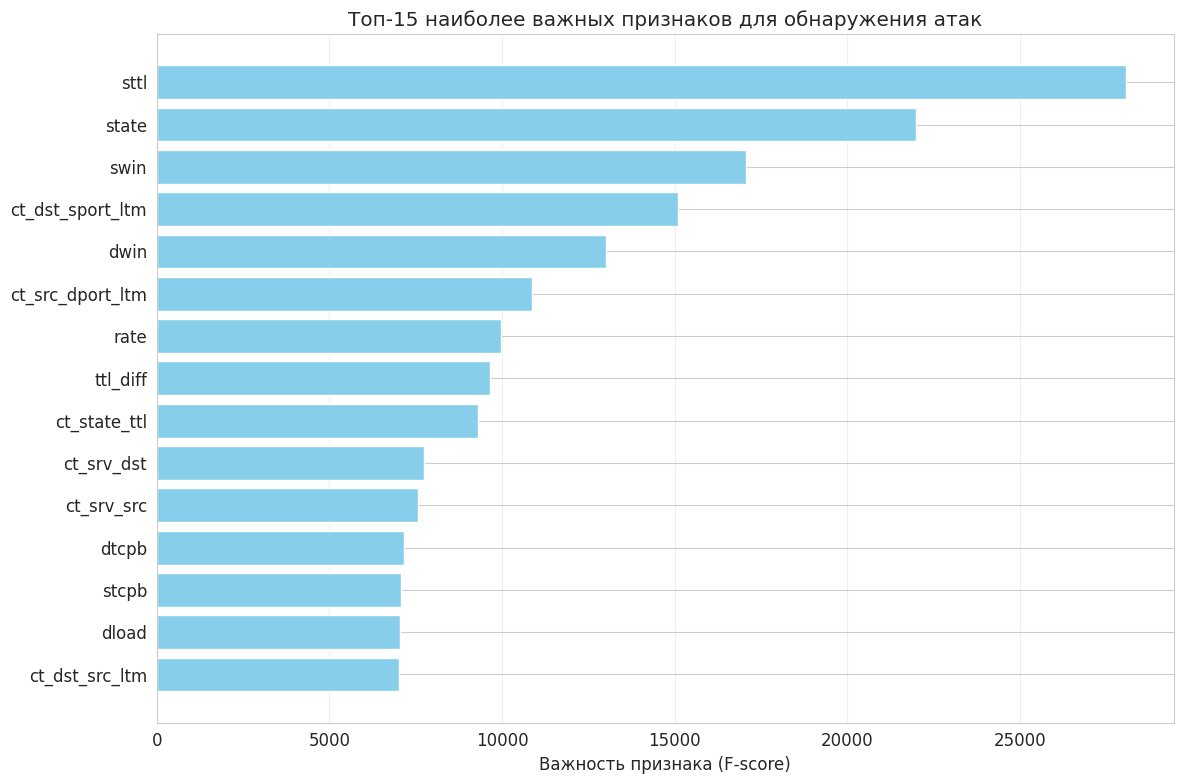

📋 Список важных признаков:
 1. sttl                 - 28058.06
 2. state                - 21979.90
 3. swin                 - 17079.97
 4. ct_dst_sport_ltm     - 15098.99
 5. dwin                 - 12998.05
 6. ct_src_dport_ltm     - 10870.05
 7. rate                 - 9967.90
 8. ttl_diff             - 9662.16
 9. ct_state_ttl         - 9295.69
10. ct_srv_dst           - 7727.74
11. ct_srv_src           - 7570.82
12. dtcpb                - 7160.10
13. stcpb                - 7081.56
14. dload                - 7032.81
15. ct_dst_src_ltm       - 7003.14


In [7]:
# 🎯 КОНСТРУИРОВАНИЕ И ОТБОР ПРИЗНАКОВ
print("ШАГ 5: Конструирование и отбор признаков...")

# Разделяем данные
X = df_clean.drop('label', axis=1)
y = df_clean['label']
print(f"📊 Признаки: {X.shape}, Целевая переменная: {y.shape}")

# Масштабируем признаки
print("⚖️ Масштабируем признаки...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Создаем новые признаки
print("🛠️ Создаем новые признаки...")
X_fe = X_scaled.copy()
new_features = []

if all(col in X_fe.columns for col in ['spkts', 'dpkts']):
    X_fe['total_pkts'] = X_fe['spkts'] + X_fe['dpkts']
    new_features.append('total_pkts')

if all(col in X_fe.columns for col in ['sbytes', 'dbytes']):
    X_fe['total_bytes'] = X_fe['sbytes'] + X_fe['dbytes']
    new_features.append('total_bytes')

if all(col in X_fe.columns for col in ['sttl', 'dttl']):
    X_fe['ttl_diff'] = abs(X_fe['sttl'] - X_fe['dttl'])
    new_features.append('ttl_diff')

print(f"✅ Созданы новые признаки: {new_features}")
print(f"📏 Новая размерность: {X_fe.shape}")

# Отбираем лучшие признаки
print("🎯 Отбираем наиболее важные признаки...")
k_features = min(15, X_fe.shape[1])
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X_fe, y)

selected_mask = selector.get_support()
selected_features = X_fe.columns[selected_mask]
selected_scores = selector.scores_[selected_mask]

print(f"✅ Отобрано {len(selected_features)} наиболее важных признаков")

# Визуализируем важность признаков
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_scores
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Важность признака (F-score)')
plt.title(f'Топ-{k_features} наиболее важных признаков для обнаружения атак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📋 Список важных признаков:")
for i, (feature, importance) in enumerate(feature_importance.sort_values('Importance', ascending=False).values, 1):
    print(f"{i:2d}. {feature:20} - {importance:.2f}")

In [8]:
# 💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("ШАГ 6: Сохранение результатов...")

# Создаем финальный датасет
final_df = X_fe[selected_features].copy()
final_df['label'] = y.values

print(f"🎉 АНАЛИЗ ЗАВЕРШЕН!")
print(f"📊 Итоговый размер данных: {final_df.shape}")
print(f"🔢 Количество признаков: {final_df.shape[1] - 1}")
print(f"📈 Количество наблюдений: {final_df.shape[0]}")

# Показываем итоговые данные
print("\n📋 Итоговые данные (первые 5 строк):")
display(final_df.head())

# Сохраняем результаты
final_df.to_csv('processed_cybersecurity_data.csv', index=False)
print("✅ Обработанные данные сохранены в 'processed_cybersecurity_data.csv'")

# Скачиваем файл на компьютер
files.download('processed_cybersecurity_data.csv')
print("✅ Файл загружен на ваш компьютер!")

print("\n" + "="*50)
print("🎯 ПРАКТИЧЕСКАЯ РАБОТА ВЫПОЛНЕНА УСПЕШНО!")
print("="*50)
print("📚 Что было сделано:")
print("   1. ✅ Загрузка данных кибератак")
print("   2. ✅ Разведочный анализ и визуализация")
print("   3. ✅ Предобработка данных")
print("   4. ✅ Конструирование и отбор признаков")
print("   5. ✅ Сохранение результатов")
print("="*50)

ШАГ 6: Сохранение результатов...
🎉 АНАЛИЗ ЗАВЕРШЕН!
📊 Итоговый размер данных: (82332, 16)
🔢 Количество признаков: 15
📈 Количество наблюдений: 82332

📋 Итоговые данные (первые 5 строк):


,state,rate,sttl,dload,swin,stcpb,dtcpb,dwin,ct_srv_src,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,ttl_diff,label
0,0.932695,0.057181,0.71944,-0.263498,-1.04792,-0.77984,-0.776754,-1.006244,-0.680474,0.591021,-0.468312,-0.450186,-0.477994,-0.644190,1.539835,0
1,0.932695,0.286565,0.71944,-0.263498,-1.04792,-0.77984,-0.776754,-1.006244,-0.680474,0.591021,-0.468312,-0.450186,-0.477994,-0.644190,1.539835,0
2,0.932695,0.791209,0.71944,-0.263498,-1.04792,-0.77984,-0.776754,-1.006244,-0.590304,0.591021,-0.468312,-0.450186,-0.390391,-0.554273,1.539835,0
3,0.932695,0.566923,0.71944,-0.263498,-1.04792,-0.77984,-0.776754,-1.006244,-0.590304,0.591021,-0.349115,-0.450186,-0.390391,-0.554273,1.539835,0
4,0.932695,0.118350,0.71944,-0.263498,-1.04792,-0.77984,-0.776754,-1.006244,-0.590304,0.591021,-0.349115,-0.450186,-0.390391,-0.554273,1.539835,0


✅ Обработанные данные сохранены в 'processed_cybersecurity_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Файл загружен на ваш компьютер!

🎯 ПРАКТИЧЕСКАЯ РАБОТА ВЫПОЛНЕНА УСПЕШНО!
📚 Что было сделано:
   1. ✅ Загрузка данных кибератак
   2. ✅ Разведочный анализ и визуализация
   3. ✅ Предобработка данных
   4. ✅ Конструирование и отбор признаков
   5. ✅ Сохранение результатов
